In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mode
from pyspark.sql.functions import col as column

In [2]:
train=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Data Science/Datasets/Loan Prediction/train.csv')
test=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Data Science/Datasets/Loan Prediction/test.csv')

In [3]:
train.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [4]:
test.count()

Loan_ID              367
Gender               356
Married              367
Dependents           357
Education            367
Self_Employed        344
ApplicantIncome      367
CoapplicantIncome    367
LoanAmount           362
Loan_Amount_Term     361
Credit_History       338
Property_Area        367
dtype: int64

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
train.describe()

/Users/adityavyas/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
print train.isnull().sum()
print '-----------------------'
print test.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
-----------------------
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [9]:
train['Gender'].fillna(np.random.choice(['Male','Female']),inplace=True)
test['Gender'].fillna(np.random.choice(['Male','Female']),inplace=True)

In [10]:
train['Gender'].isnull().sum(),test['Gender'].isnull().sum()

(0, 0)

In [11]:
train['Married'].fillna(np.random.choice(['Yes','No']),inplace=True)

In [12]:
print train['Dependents'].value_counts()
print '---------------------------------'
print test['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
---------------------------------
0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64


In [13]:
#We will set the dependents to 0 since they are the maximum

train['Dependents'].fillna(0,inplace=True)
test['Dependents'].fillna(0,inplace=True)

In [14]:
train['Dependents'].isnull().sum(),test['Dependents'].isnull().sum()

(0, 0)

In [15]:
#We check the same for self employed

print train['Self_Employed'].value_counts()
print '---------------------------------'
print test['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64
---------------------------------
No     307
Yes     37
Name: Self_Employed, dtype: int64


In [16]:
#We set the self-employed to No because they are maximum

train['Self_Employed'].fillna('No',inplace=True)
test['Self_Employed'].fillna('No',inplace=True)

In [17]:
print train.isnull().sum()
print '-----------------------'
print test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
-----------------------
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [18]:
#Now we impute the missing values of Loan Amount by creating a pivot 

loan_pivot=train.pivot_table(values='LoanAmount',index=['Gender','Married','Education','Self_Employed'],aggfunc=np.mean)
loan_pivot

Gender  Married  Education     Self_Employed
Female  No       Graduate      No               116.966667
                               Yes              142.250000
                 Not Graduate  No                97.100000
                               Yes              137.333333
        Yes      Graduate      No               165.321429
                               Yes              250.166667
                 Not Graduate  No               119.000000
                               Yes              138.000000
Male    No       Graduate      No               141.070588
                               Yes              182.833333
                 Not Graduate  No                98.461538
                               Yes              146.000000
        Yes      Graduate      No               159.569565
                               Yes              179.611111
                 Not Graduate  No               125.058824
                               Yes              128.333333
Name: LoanA

In [19]:
def set_loan_amount(x):
    index=(x['Gender'],x['Married'],x['Education'],x['Self_Employed'])
    if pd.isnull(x['LoanAmount']):
        x['LoanAmount']=loan_pivot.loc[index]
    return x

train2=train.apply(lambda x:set_loan_amount(x),1)
test2=test.apply(lambda x:set_loan_amount(x),1)

In [20]:
print train2.isnull().sum()
print '-----------------------'
print test2.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
-----------------------
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [21]:
#For Loan Amount Term we check for unique values

train2['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
test2['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
350.0      1
120.0      1
60.0       1
36.0       1
12.0       1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [23]:
#Since most of the Loan terms are 360 we will set them to 360

train2['Loan_Amount_Term'].fillna(360.0,inplace=True)
test2['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [24]:
train2['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [25]:
test2['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [26]:
#Since most of them are 1 we will assign 1.0 to Credit History

train2['Credit_History'].fillna(1.0,inplace=True)
test2['Credit_History'].fillna(1.0,inplace=True)

In [27]:
print train2.isnull().sum()
print '-----------------------'
print test2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
-----------------------
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


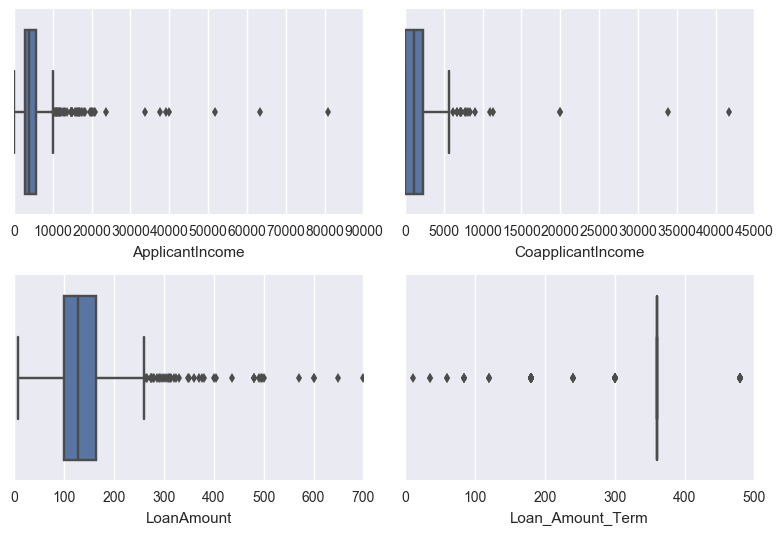

In [28]:
#Now we will remove outliers

fig,ax=plt.subplots(2,2)
sns.boxplot('ApplicantIncome',hue='Gender',data=train2,ax=ax[0,0])
sns.boxplot('CoapplicantIncome',hue='Gender',data=train2,ax=ax[0,1])
sns.boxplot('LoanAmount',hue='Gender',data=train2,ax=ax[1,0])
sns.boxplot('Loan_Amount_Term',hue='Gender',data=train2,ax=ax[1,1])
plt.tight_layout()

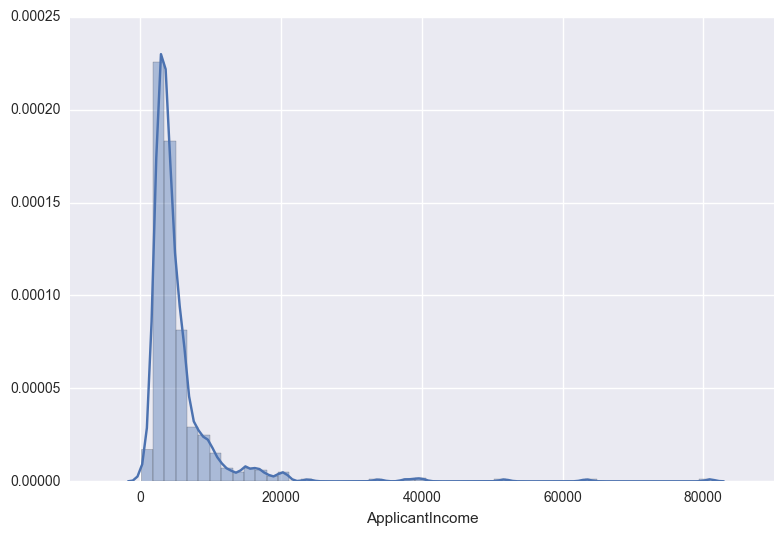

In [29]:
#We plot the histograms

plt.figure(1)
sns.distplot(train2['ApplicantIncome'])
plt.tight_layout()

In [30]:
#We create a new column-Income and combine Applicant and Coapplicant incomes

train2['Income']=train2['ApplicantIncome']+train2['CoapplicantIncome']
test2['Income']=test2['ApplicantIncome']+test2['CoapplicantIncome']

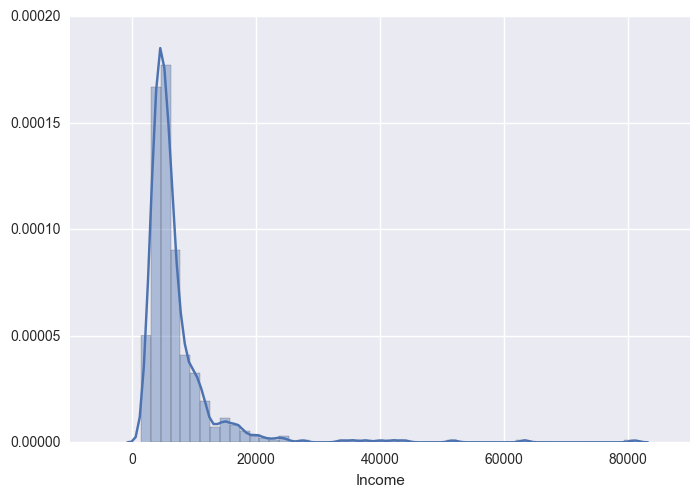

In [31]:
sns.distplot(train2['Income'])

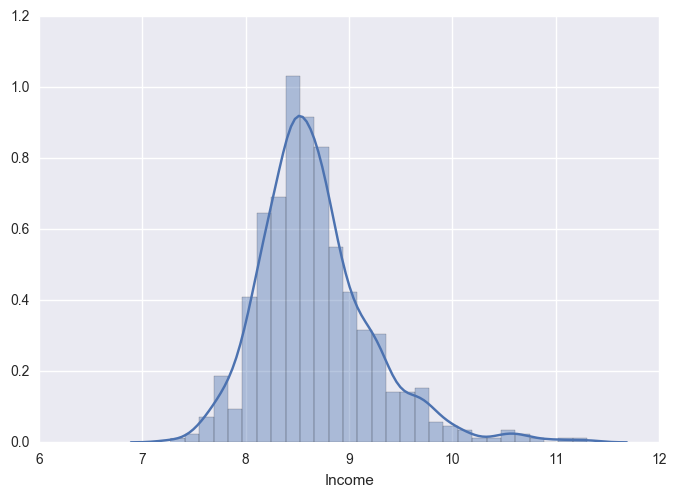

In [32]:
#Lets normalize the Income by taking its Log

sns.distplot(np.log(train2['Income']))

In [33]:
#Thus we take the log of the income

train2['Income_Normalized']=np.log(train2['Income'])
test2['Income_Normalized']=np.log(test2['Income'])

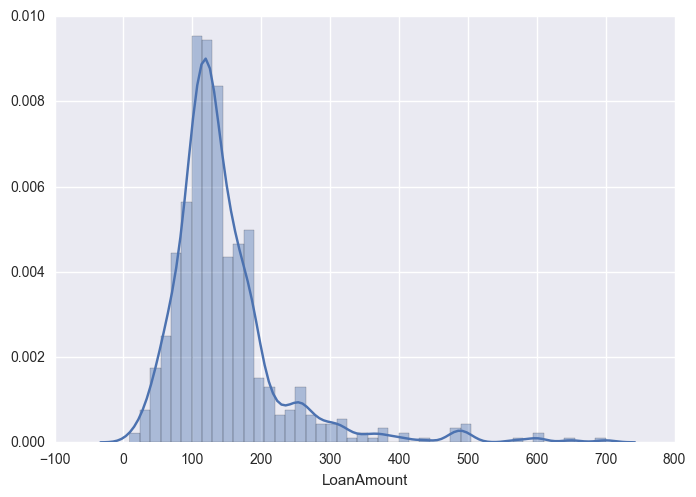

In [34]:
#Now for loan amount
plt.figure(3)
sns.distplot(train2['LoanAmount'])

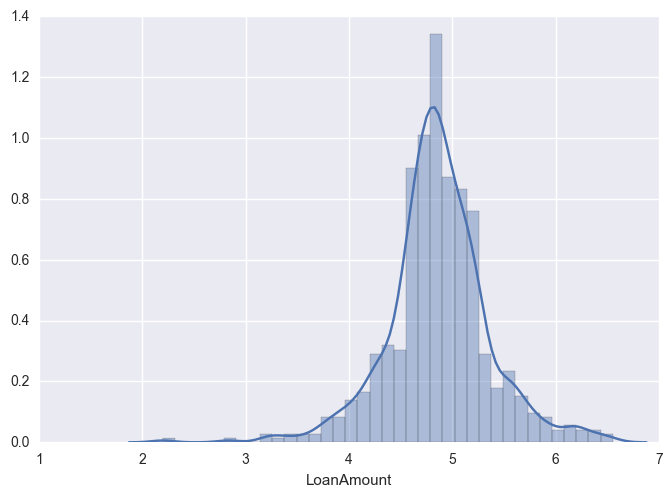

In [35]:
#Lets normalize this also using log and plot the histogram

plt.figure(3)
sns.distplot(np.log(train2['LoanAmount']))

In [36]:
train2['Loan_Amount_Normalized']=np.log(train2['LoanAmount'])
test2['Loan_Amount_Normalized']=np.log(test2['LoanAmount'])

In [37]:
#Let us drop the modified columns 

train2.drop(['LoanAmount'],1,inplace=True)
test2.drop(['LoanAmount'],1,inplace=True)

In [38]:
train2.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,Income_Normalized,Loan_Amount_Normalized
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y,5849.0,8.674026,4.94926


In [39]:
train2['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [40]:
#We make some changes to Gender,Married and Self-Employed columns

train2.replace( {'Gender': {'Male': 1.0,'Female':0.0},'Married':{'No':0.0,'Yes':1.0},
                 'Education':{'Graduate':1.0,'Not Graduate':0.0},'Self_Employed':{'No':0.0,'Yes':1.0}},inplace=True)

test2.replace( {'Gender': {'Male': 1.0,'Female':0.0},'Married':{'No':0.0,'Yes':1.0},
                 'Education':{'Graduate':1.0,'Not Graduate':0.0},'Self_Employed':{'No':0.0,'Yes':1.0}},inplace=True)

In [41]:
train2.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,Income_Normalized,Loan_Amount_Normalized
0,LP001002,1.0,0.0,0,1.0,0.0,5849,0.0,360.0,1.0,Urban,Y,5849.0,8.674026,4.949260
1,LP001003,1.0,1.0,1,1.0,0.0,4583,1508.0,360.0,1.0,Rural,N,6091.0,8.714568,4.852030
2,LP001005,1.0,1.0,0,1.0,1.0,3000,0.0,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655
3,LP001006,1.0,1.0,0,0.0,0.0,2583,2358.0,360.0,1.0,Urban,Y,4941.0,8.505323,4.787492
4,LP001008,1.0,0.0,0,1.0,0.0,6000,0.0,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760


In [42]:
#Now we have made almost all of our variables non-categorical except property. Lets encode it and create dummy variables

dummies_property_train=pd.get_dummies(train2['Property_Area'])
dummies_property_test=pd.get_dummies(test2['Property_Area'])

dummies_depedents_train=pd.get_dummies(train2['Dependents'])
dummies_depedents_test=pd.get_dummies(test2['Dependents'])

train2=train2.join(dummies_property_train).join(dummies_depedents_train)
test2=test2.join(dummies_property_test).join(dummies_depedents_test)

train2.drop(['Property_Area','Dependents'],1,inplace=True)
test2.drop(['Property_Area','Dependents'],1,inplace=True)

In [43]:
train2.head(2)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_Status,...,Income_Normalized,Loan_Amount_Normalized,Rural,Semiurban,Urban,0,0,1,2,3+
0,LP001002,1.0,0.0,1.0,0.0,5849,0.0,360.0,1.0,Y,...,8.674026,4.94926,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,LP001003,1.0,1.0,1.0,0.0,4583,1508.0,360.0,1.0,N,...,8.714568,4.85203,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


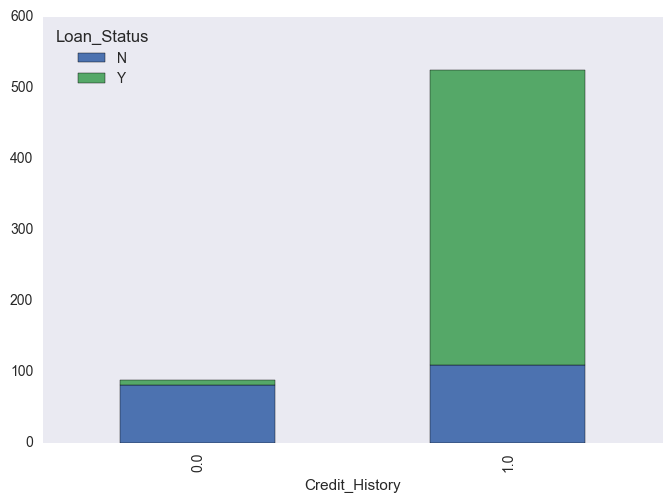

In [44]:
credit_term1 = pd.crosstab(train2['Credit_History'], train2['Loan_Status'])
credit_term1.plot(kind='bar', stacked=True, grid=False)

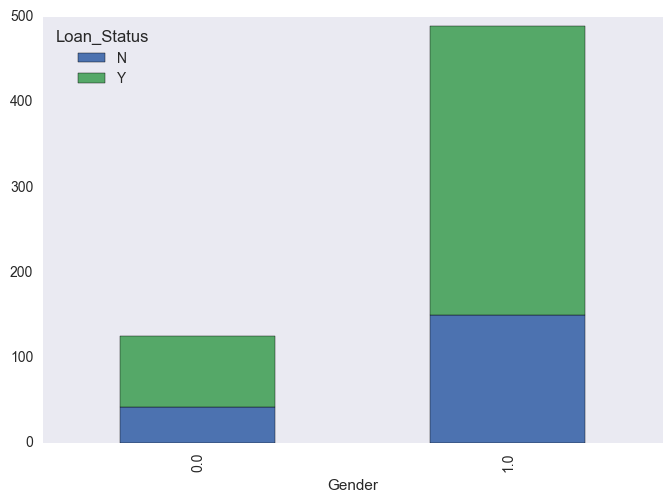

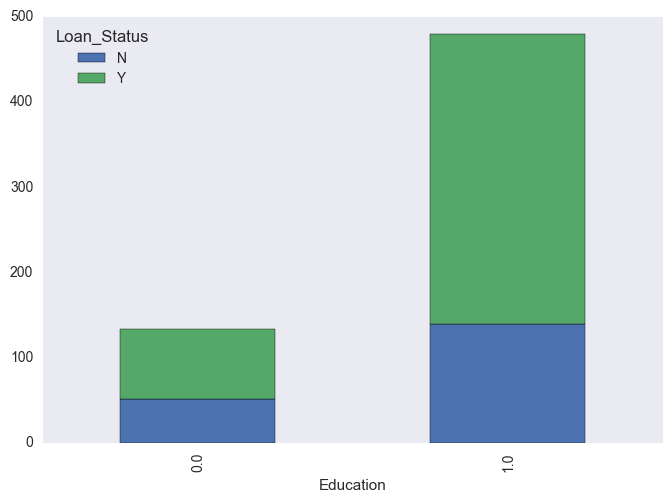

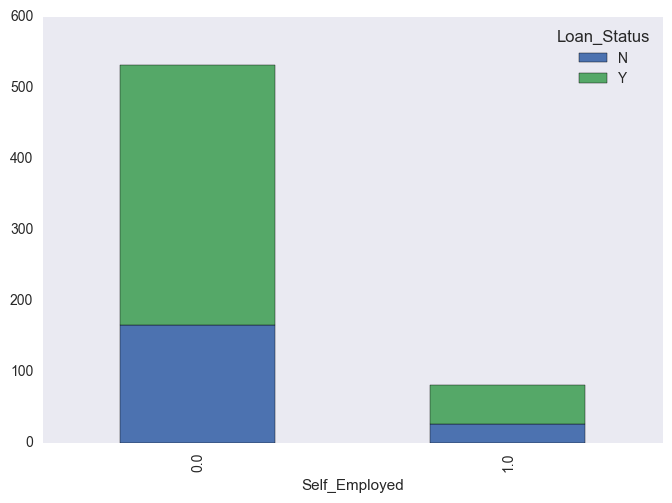

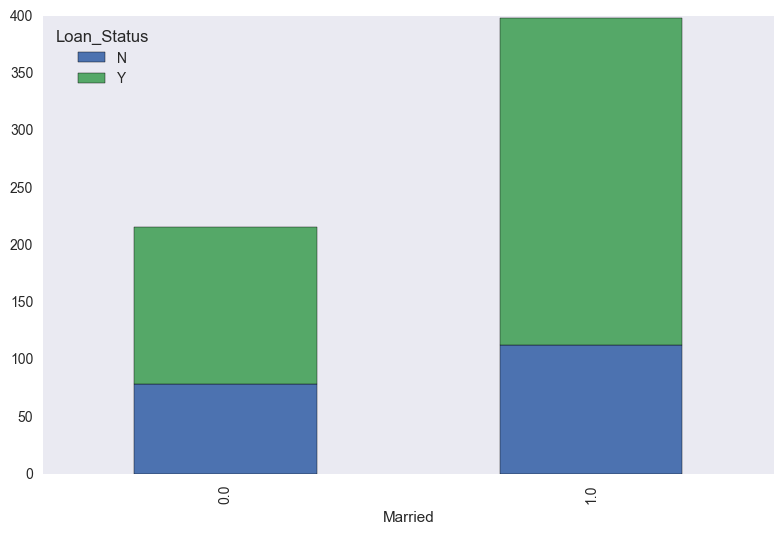

In [45]:
#Also for Gender,Education,Self_Employed and Married

credit_term2 = pd.crosstab([train2['Gender']],train2['Loan_Status'])
credit_term3 = pd.crosstab([train2['Education']],train2['Loan_Status'])
credit_term4 = pd.crosstab([train2['Self_Employed']],train2['Loan_Status'])
credit_term5 = pd.crosstab([train2['Married']],train2['Loan_Status'])

plt.figure(1)
credit_term2.plot(kind='bar', stacked=True, grid=False)
plt.figure(2)
credit_term3.plot(kind='bar', stacked=True, grid=False)
plt.figure(3)
credit_term4.plot(kind='bar', stacked=True, grid=False)
plt.figure(4)
credit_term5.plot(kind='bar', stacked=True, grid=False)
plt.tight_layout()

In [46]:
loan_id_test=test2['Loan_ID']
train2=train2.drop('Loan_ID',1)
test2=test2.drop('Loan_ID',1)

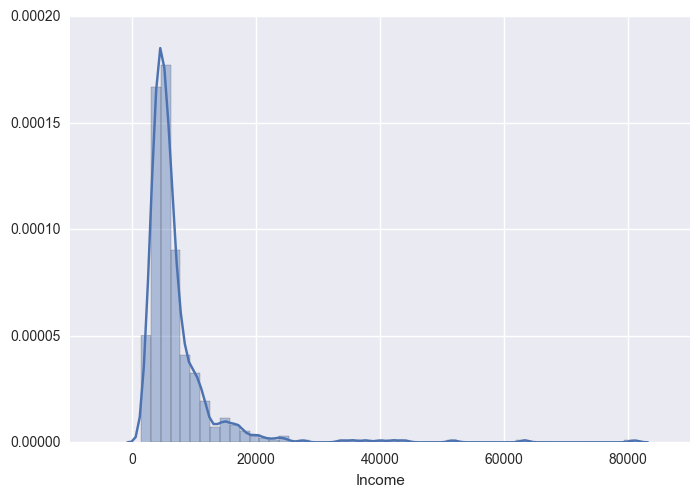

In [47]:
sns.distplot(train2['Income'])

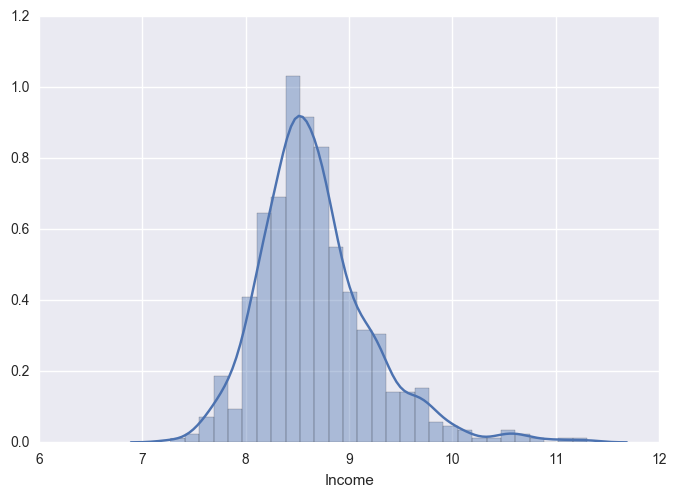

In [48]:
sns.distplot(np.log(train2['Income']))

In [49]:
train2['Income_Normalized']=np.log(train2['Income'])
test2['Income_Normalized']=np.log(test2['Income'])

In [50]:
train2.drop('Income',1,inplace=True)
test2.drop('Income',1,inplace=True)

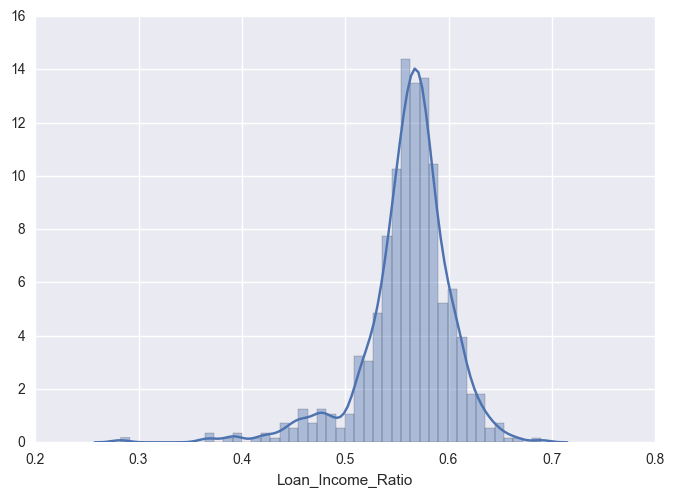

In [51]:
#We create a new column-the ratio between loan amount requested and the income
from math import sqrt
train2['Loan_Income_Ratio']=train2['Loan_Amount_Normalized']/train2['Income_Normalized']
test2['Loan_Income_Ratio']=test2['Loan_Amount_Normalized']/test2['Income_Normalized']
sns.distplot((train2['Loan_Income_Ratio']))

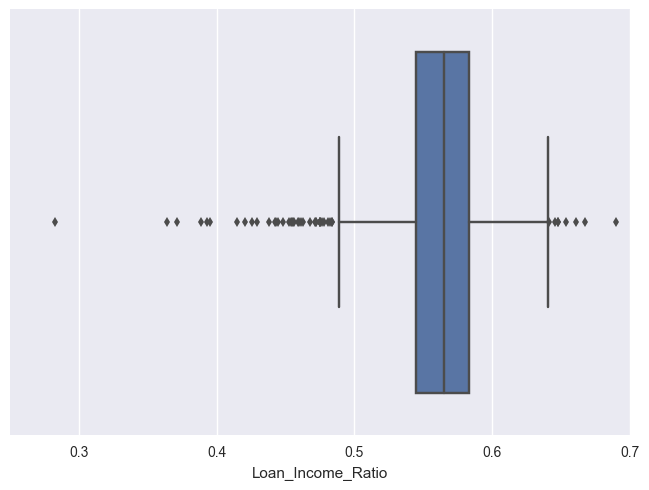

In [52]:
sns.boxplot('Loan_Income_Ratio',data=train2)

/Users/adityavyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


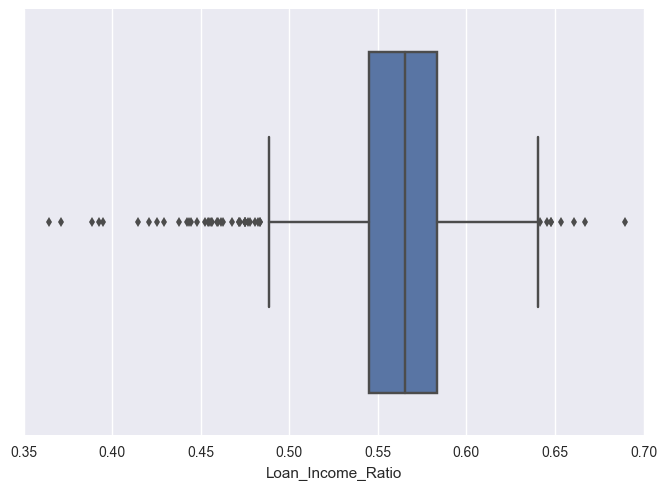

In [53]:
train2['Loan_Income_Ratio'][train2['Loan_Income_Ratio']<0.3]=train2['Loan_Income_Ratio'].mean()
sns.boxplot('Loan_Income_Ratio',data=train2)

In [54]:
#Create the train and test sets

X_TRAIN,Y_TRAIN=train2.drop('Loan_Status',1),train2['Loan_Status']
X_TEST=test2

In [62]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,NaN,NaN,NaN
50%,3786.000000,1025.000000,NaN,NaN,NaN
75%,5060.000000,2430.500000,NaN,NaN,NaN
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [55]:
from sklearn import cross_validation,metrics,linear_model,ensemble,svm

logreg=linear_model.LogisticRegression(fit_intercept=True)
logreg.fit(X_TRAIN,Y_TRAIN)
Y_PRED=logreg.predict(X_TEST)

In [56]:
sv=svm.SVC()
sv.fit(X_TRAIN,Y_TRAIN)
Y_PRED2=sv.predict(X_TEST)

In [57]:
forest=ensemble.RandomForestClassifier(n_estimators=400)
forest.fit(X_TRAIN,Y_TRAIN)
Y_PRED3=forest.predict(X_TEST)

In [61]:
final=pd.DataFrame(data={'Loan_ID':loan_id_test,'Loan_Status':Y_PRED3})
final.to_csv('/Users/adityavyas/Desktop/loan2.csv')

In [59]:
train2.head(1)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_Status,Income_Normalized,Loan_Amount_Normalized,Rural,Semiurban,Urban,0,0,1,2,3+,Loan_Income_Ratio
0,1.0,0.0,1.0,0.0,5849,0.0,360.0,1.0,Y,8.674026,4.94926,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.570584


In [60]:
loan_id_test

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
5      LP001054
6      LP001055
7      LP001056
8      LP001059
9      LP001067
10     LP001078
11     LP001082
12     LP001083
13     LP001094
14     LP001096
15     LP001099
16     LP001105
17     LP001107
18     LP001108
19     LP001115
20     LP001121
21     LP001124
22     LP001128
23     LP001135
24     LP001149
25     LP001153
26     LP001163
27     LP001169
28     LP001174
29     LP001176
         ...   
337    LP002856
338    LP002857
339    LP002858
340    LP002860
341    LP002867
342    LP002869
343    LP002870
344    LP002876
345    LP002878
346    LP002879
347    LP002885
348    LP002890
349    LP002891
350    LP002899
351    LP002901
352    LP002907
353    LP002920
354    LP002921
355    LP002932
356    LP002935
357    LP002952
358    LP002954
359    LP002962
360    LP002965
361    LP002969
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, dtype: ob